# Laplacian operator

## Bi-clustering

Let's try first with some parameters that will affect clearly the second eigenvector's components.

In [1]:
Nb1 = 50
Nb2 = 50
Pb1 = 0.3
Pb2 = 0.3
P12 = 0.05

We can also try with parameters that will not show any effect, for example having too close probabilities or two different sizes of subnetworks.

In [2]:
# Nb1 = 50
# Nb2 = 50
# Pb1 = 0.3
# Pb2 = 0.3
# P12 = 0.15

In [3]:
# Nb1 = 20
# Nb2 = 80
# Pb1 = 0.3
# Pb2 = 0.3
# P12 = 0.05

Let's generate an ER random network with the variables we've just set up.
We can clearly see the two highly connected networks.

<Axes: >

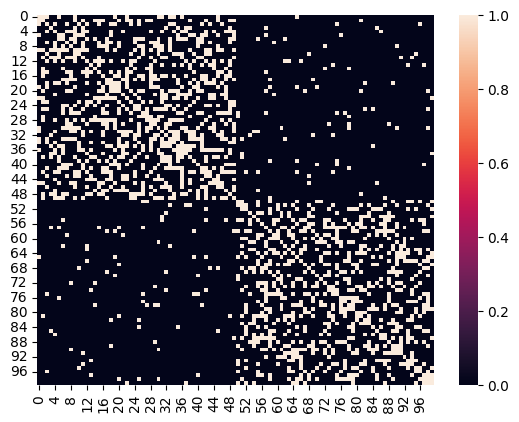

In [4]:
import numpy as np

Net = np.triu(np.random.rand(Nb1+Nb2, Nb1+Nb2), k=1)
Net[0:Nb1, Nb1:Nb1+Nb2] = Net[0:Nb1, Nb1:Nb1+Nb2] < P12
Net = Net + Net.T
Net[0:Nb1, 0:Nb1] = Net[0:Nb1, 0:Nb1] < Pb1
Net[Nb1:Nb1+Nb2, Nb1:Nb1+Nb2] = Net[Nb1:Nb1+Nb2, Nb1:Nb1+Nb2] < Pb2

import seaborn as sns

sns.heatmap(Net)

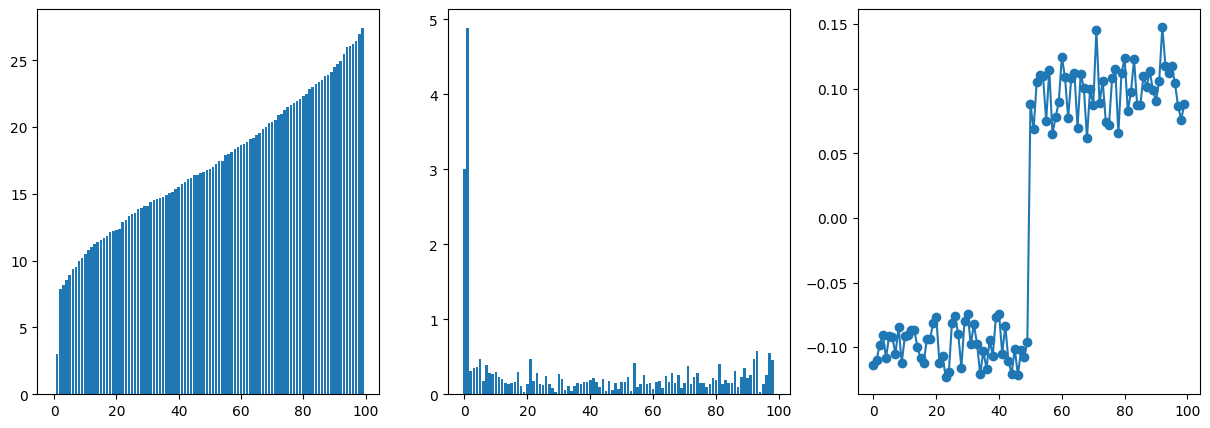

In [5]:
import scipy as sp

ll = sp.sparse.csgraph.laplacian(Net, normed=False)

Val, Vec = np.linalg.eig(ll)
Val = np.sort(Val)

from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].bar(range(0, len(Val)), Val)
ax[1].bar(range(0, len(Val)-1), np.diff(Val))
ax[2].plot(Vec[:, 1], '-o')

## Chain - 1D lattice

Usually the topological features of our graphs result in some spectral properties.
For instance, we can see how the chain structure affects the eigenvalues and the eigenvector corresponding to the Fiedler number.

<Axes: >

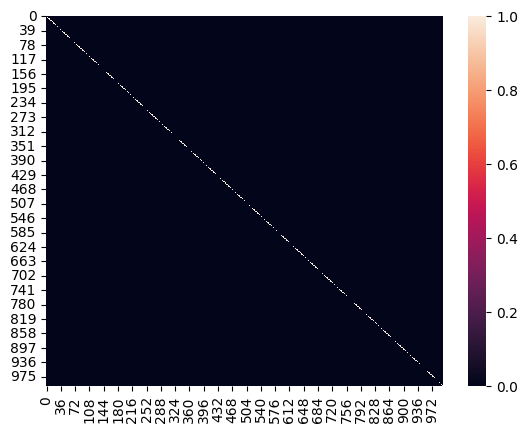

In [6]:
Nnode = 1000
aa = np.zeros((Nnode, Nnode))
aa += np.diag(np.ones(Nnode-1), k=1) + np.diag(np.ones(Nnode-1), k=-1)

sns.heatmap(aa)

The adjacency matrix of a chain is very regular and the distribution of its eigenvalues is a monotonic function, then we have a way to label nodes.

<BarContainer object of 1000 artists>

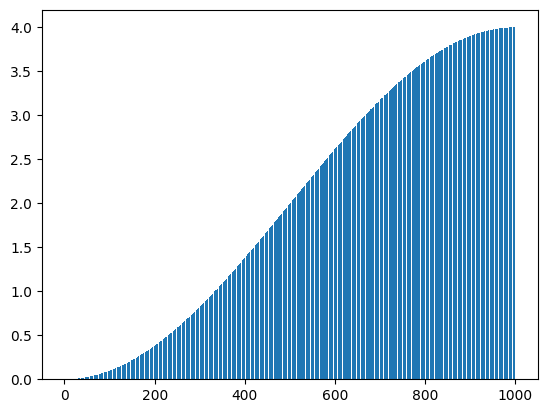

In [7]:
ll = sp.sparse.csgraph.laplacian(aa, normed=False)

Val, Vec = np.linalg.eig(ll)
ind = np.argsort(Val)
Val = Val[ind]
Vec = Vec[:, ind]

plt.bar(range(0, len(Val)), Val)

Moreover, plotting the matrix of eigenvectors we can see a sort of periodicity in their values.

<Axes: >

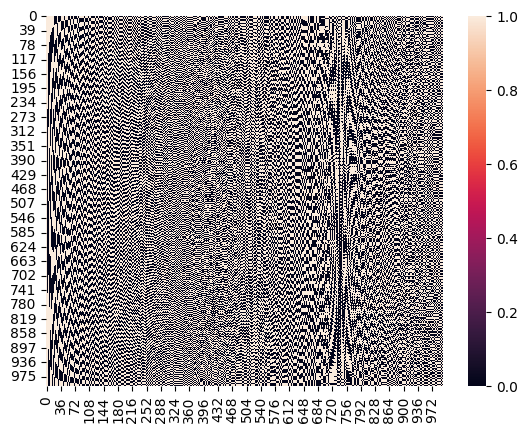

In [8]:
sns.heatmap(Vec>0)

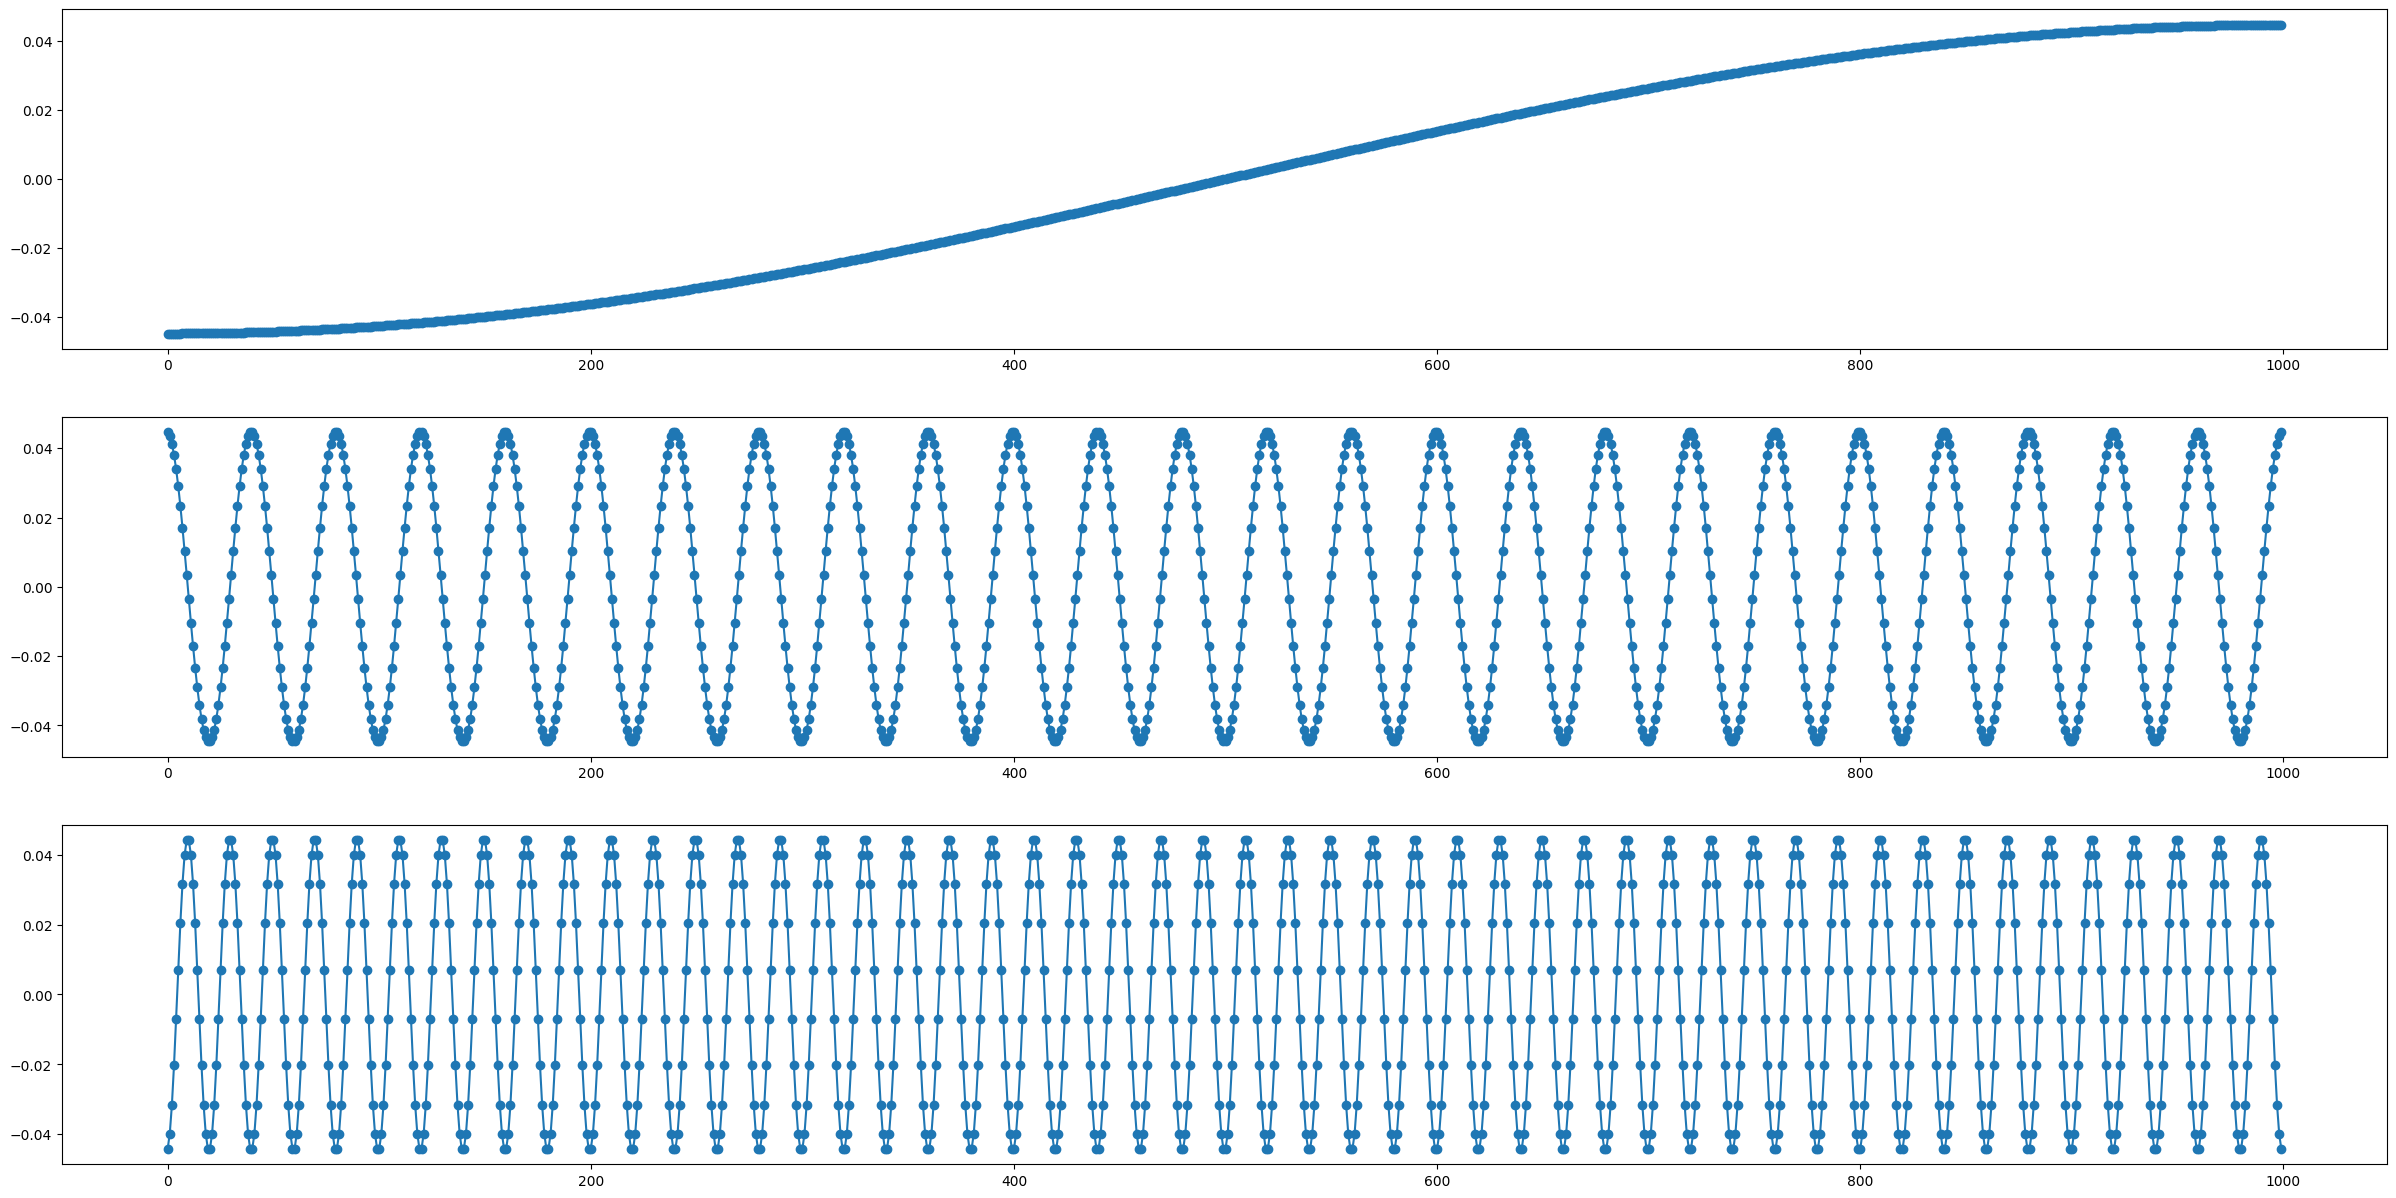

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(30, 15))

ax[0].plot(Vec[:, 1], '-o')
ax[1].plot(Vec[:, 50], '-o')
ax[2].plot(Vec[:, 100], '-o')

As all good physicist do, periodic signals MUST be decomposed with Fourier, so here we go.
We can notice that we need to be in the thermodynamic limit in order to obtain the pure delta function (in the frequency domain).

<BarContainer object of 70 artists>

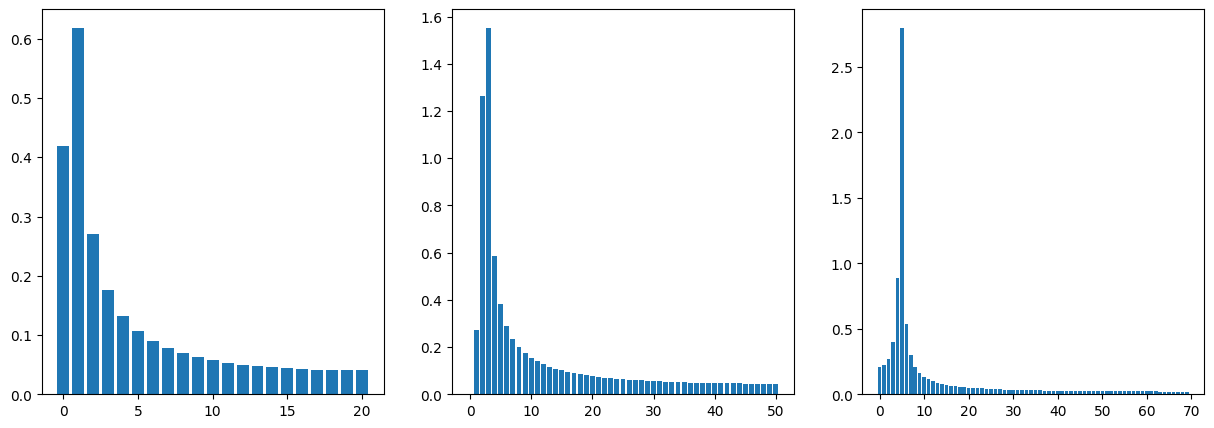

In [10]:
ff1 = np.fft.rfft(Vec[:, 20], n=20*2)
ff2 = np.fft.rfft(Vec[:, 50], n=50*2)
ff3 = np.fft.rfft(Vec[:, 69], n=69*2)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].bar(np.arange(len(ff1)), np.abs(ff1))
ax[1].bar(np.arange(len(ff2)), np.abs(ff2))
ax[2].bar(np.arange(len(ff3)), np.abs(ff3))

## 2D lattice

In [11]:
def reticolo2d(N, P):
    # N = lattice side
    # P = number of nearest neighbors
    Nq = N*N
    A = sp.sparse.lil_matrix((Nq, Nq))

    for i1 in range(Nq):
        for i2 in range(i1, Nq):
            if (i2-i1) <= P and i2 != i1 and i1 % N > 0:
                A[i1, i2] = 1
            elif (i2 - i1) == N:
                A[i1, i2] = 1
    
    A = A + A.T
    return A

<Axes: >

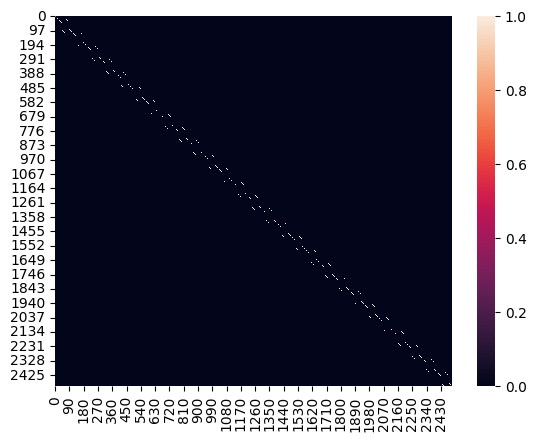

In [12]:
Net = reticolo2d(50, 1)

sns.heatmap(Net.toarray())

In [13]:
ll = sp.sparse.csgraph.laplacian(Net.toarray(), normed=False)

Val, Vec = np.linalg.eig(ll)
ind = np.argsort(Val)
Val = Val[ind]
Vec = Vec[:, ind]

Plotting the eigenvalues in a bar plot we notice how there are many with multiplicity 2.

<BarContainer object of 12 artists>

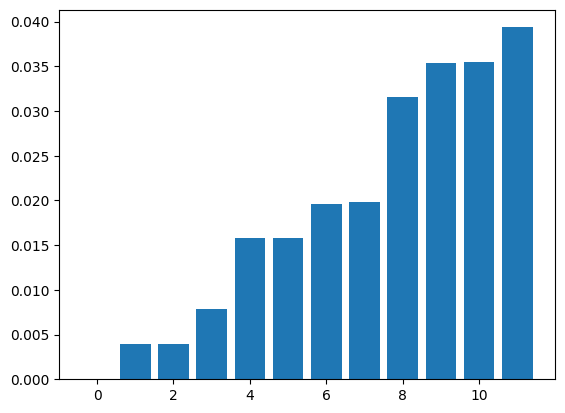

In [14]:
plt.bar(range(0, len(Val[0:12])), Val[0:12])

Here is a weird thing: plotting a pair of eigenvectors with the same eigenvalue will result in the reticle itself.
Notice how, due to the finite dimension of it, we've also border effects: in the thermodynamic limit they'll vanish (at least theoretically).

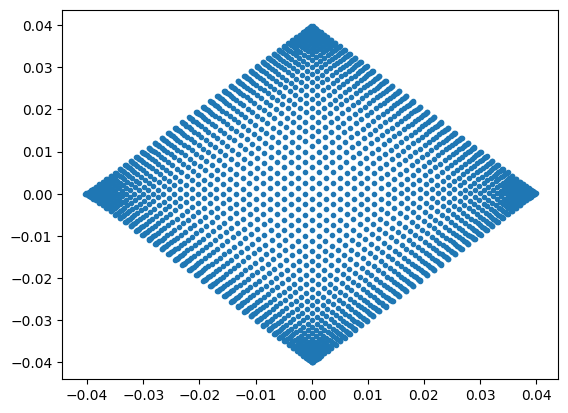

In [15]:
plt.plot(Vec[:, 1], Vec[:, 2], '.')